## WAVE ENERGY FORECASTING: A RIGOROUS MACHINE LEARNING APPROACH

Project: Advanced Wave Energy Flux Forecasting Using Ensemble Methods and 
         Deep Learning with Uncertainty Quantification
Target Station: NDBC Buoy 41025 (Diamond Shoals, NC)

Repository: https://github.com/RichelCode/Wave-Energy-Forecasting-Methodological-Enhancement-and-Advanced-Modeling

Paper Reference: Building upon "A Hybrid Machine Learning Approach to Wave 
                 Energy Forecasting" (TIefu et al., 2021, NAPS)

## Executive Summary

This notebook implements a comprehensive wave energy forecasting system that addresses critical methodological limitations in existing literature while advancing toward state-of-the-art performance. Our work builds upon and significantly improves the methodology presented in TIefu et al. (2021), incorporating:

Key Improvements:
- Rigorous time series cross-validation (eliminating data leakage)
- Spatial imputation using neighbor station data (preserving temporal continuity)
- Comprehensive feature engineering with temporal lags and domain knowledge
- Systematic hyperparameter optimization using Bayesian methods
- Statistical significance testing for model comparisons
- Neural network baselines (LSTM, GRU) alongside tree-based methods
- Probabilistic forecasting with uncertainty quantification
- Multi-horizon evaluation (1h, 3h, 6h, 12h, 24h ahead)

## Problem Context and Motivation

###  The Wave Energy Challenge

Wave energy represents a **largely untapped renewable resource** with estimated potential of:
- **1,170 TWh/year** along US coastlines (EPRI, 2011)
- **2-3 TW global theoretical capacity** (Gunn & Stock-Williams, 2012)
- **Predictable and high energy density** compared to wind/solar

However, **grid integration of wave energy** requires accurate forecasting for:

1. **Power System Operations:**
   - Unit commitment and economic dispatch optimization
   - Spinning reserve allocation
   - Transmission congestion management
   - Ancillary service procurement

2. **Wave Energy Converter (WEC) Management:**
   - Preventive maintenance scheduling during calm periods
   - Survival mode activation before extreme events
   - Optimal power extraction strategies
   - Component lifetime optimization

3. **Market Participation:**
   - Day-ahead and real-time market bidding
   - Financial risk management
   - Revenue optimization under uncertainty

### Critical Forecasting Parameters

Wave energy flux (kW/m) depends primarily on:

**Significant Wave Height (H_s):** 
- The mean height of the highest 1/3 of waves in a time period
- Directly measured by buoy accelerometers
- Energy ∝ H_s² (quadratic relationship amplifies forecast errors)

**Wave Period (T):**
- Dominant Period (DPD): Period of peak energy in wave spectrum
- Average Period (APD): Mean period of all waves
- Energy ∝ T (linear relationship but crucial for power capture)

**Wave Energy Flux Formula:**
$$E = \frac{\rho g^2 H_s^2 T}{64\pi} \approx 0.49 H_s^2 T \text{ (kW/m in deep water)}$$

Where:
- ρ = seawater density ≈ 1025 kg/m³
- g = gravitational acceleration = 9.81 m/s²
- H_s = significant wave height (m)
- T = wave period (s)

**Implication:** A 10% error in H_s translates to ~20% error in energy flux due to quadratic relationship. This demands high-accuracy forecasting.


## Literature Review and Research Gaps

### Existing Approaches

**Physics-Based Models:**
- WAVEWATCH III, SWAN (Simulating WAves Nearshore)
- **Pros:** Based on first principles, global applicability
- **Cons:** Computationally expensive (hours for 24h forecast), require accurate wind forcing, cumulative error from physics approximations

**Statistical/ML Models:**
- ARIMA, SARIMA for time series
- Neural Networks (ANN, LSTM, GRU)
- Tree-based methods (Random Forest, XGBoost)
- **Pros:** Fast inference, learn from data patterns
- **Cons:** Site-specific training, require substantial historical data

**Hybrid Models:**
- Decomposition + ML (VMD-LSTM, EMD-XGBoost)
- Stacking ensembles combining multiple algorithms
- Physics-informed neural networks
- **Pros:** Leverage complementary strengths
- **Cons:** Increased complexity, hyperparameter tuning challenges

### Identified Research Gaps (TIefu et al., 2021)

After thorough review of the foundational paper, we identified **critical methodological deficiencies:**

| Issue | Impact | Our Solution |
|-------|--------|--------------|
| Single train-test split | Overfitting risk, no robustness assessment | Time series cross-validation |
| No hyperparameter tuning | Unfair model comparison | Bayesian optimization (Optuna) |
| Missing neural network baselines | Incomplete various model comparison | LSTM, GRU, TCN (Temporal Convolutional Neural Network) implementations |
| Simple outlier deletion | Data loss, temporal gaps | Spatial imputation from neighbor station |
| No temporal lags | Limited forecasting capability | Lag features [1, 3, 6, 12, 24, 48h] |
| No statistical testing | Uncertain significance of improvements | Paired t-tests, DM tests, bootstrap CI |
| Point predictions only | No uncertainty quantification | Quantile regression, conformal prediction |
| Single horizon evaluation | Limited operational utility | Multi-horizon [1, 3, 6, 12, 24h] |

**Our work systematically addresses each of these gaps.**


## Research Objectives and Hypotheses

### Primary Objectives

**Objective 1:** Develop a methodologically rigorous wave energy forecasting framework that eliminates common pitfalls in applied ML research (data leakage, inadequate validation, missing baselines).

**Objective 2:** Systematically compare tree-based ensemble methods (XGBoost, Random Forest) and deep learning architectures (LSTM, GRU, TCN) under fair experimental conditions with proper hyperparameter tuning.

**Objective 3:** Design and validate a heterogeneous ensemble approach that combines complementary model strengths while avoiding redundancy.

**Objective 4:** Implement probabilistic forecasting to quantify prediction uncertainty for operational decision-making.

**Objective 5:** Evaluate performance across multiple forecast horizons (1-24 hours) and wave energy regimes (low, moderate, high, extreme).


## Data Sources and Study Site

### Target Location: Diamond Shoals, NC (NDBC Station 41025)

**Geographic Characteristics:**
- **Coordinates:** 35.006°N, 75.402°W
- **Location:** 15 nautical miles southeast of Cape Hatteras, North Carolina
- **Water Depth:** 48.8 meters (deep water conditions)
- **Exposure:** Open Atlantic Ocean, high wave energy environment
- **Wave Climate:** Mixed sea and swell, strong seasonal variability

**Strategic Importance:**
- Located in the **U.S. Mid-Atlantic wave energy hotspot**
- Representative of conditions for proposed WEC deployments
- Long historical record (1990s-present) for robust modeling
- Well-maintained instrument with high data quality

**Why This Location?**
- Cape Hatteras region has **average wave power >30 kW/m** (top 10% of US sites)
- Proximity to population centers (Virginia, North Carolina coast)
- Overlaps with proposed offshore wind farms (potential co-location)
- Existing grid infrastructure for renewable integration

### Data Description

**Source:** National Data Buoy Center (NDBC), NOAA
**Temporal Coverage:** January 2014 - December 2019 (6 years)
**Temporal Resolution:** Hourly measurements
**Total Potential Records:** 52,608 hours

**Variables Available:**

| Variable | Symbol | Unit | Description | Role in Analysis |
|----------|--------|------|-------------|------------------|
| Significant Wave Height | WVHT | meters | Mean height of highest 1/3 waves | **Primary Target** |
| Dominant Wave Period | DPD | seconds | Period at spectral peak | **Primary Target** |
| Average Wave Period | APD | seconds | Mean wave period | **Secondary Target/Feature** |
| Mean Wave Direction | MWD | degrees | Direction waves coming from | Feature |
| Wind Direction | WDIR | degrees | Direction wind coming from | Feature |
| Wind Speed | WSPD | m/s | 10-minute average wind speed | Feature |
| Wind Gust | GST | m/s | Peak 5-second wind speed | Feature |
| Atmospheric Pressure | PRES | hPa | Sea-level pressure | Feature |
| Air Temperature | ATMP | °C | Air temperature | Feature |
| Sea Surface Temperature | WTMP | °C | Water temperature at 1m depth | Feature |

**Derived Targets:**
- **Wave Energy Flux** (kW/m): Calculated from WVHT and DPD using deep water approximation
- **Wave Power Production** (kW): Theoretical power capture assuming 30% WEC efficiency

### Data Quality Considerations

**Known Issues (from NDBC documentation):**
- Missing data codes: 999, 9999, 99.0 (varies by variable)
- Sensor failures during extreme weather events (non-random missingness)
- Occasional calibration gaps during maintenance periods
- Wave direction uncertainty during low wave conditions

# DATA LOADING AND INITIAL ASSESSMENT

## Understanding NDBC Data Format

In [1]:
"""
NDBC Standard Meteorological Data Format (from NDBC documentation):

The data files contain hourly observations with the following characteristics:

FILE STRUCTURE:
- Line 1: Column headers (variable names)
- Line 2: Unit specifications  
- Line 3+: Hourly data records

MISSING DATA CODES:
- 999  or 999.0  → Missing wave/wind data
- 9999 or 9999.0 → Missing pressure data  
- 99   or 99.0   → Missing temperature data
- MM   → Missing month/time component

COMMON VARIABLES:
#YY  = Year (2014-2019 in our case)
MM   = Month (1-12)
DD   = Day (1-31)
hh   = Hour (0-23)
mm   = Minute (usually 00 or 50)
WDIR = Wind direction (degrees, meteorological convention)
WSPD = Wind speed (m/s)
GST  = Wind gust (m/s)
WVHT = Significant wave height (meters)
DPD  = Dominant wave period (seconds)
APD  = Average wave period (seconds)  
MWD  = Mean wave direction (degrees)
PRES = Sea level pressure (hPa)
ATMP = Air temperature (°C)
WTMP = Sea surface temperature (°C)
"""

print("NDBC Data Format Documentation")
print("=" * 80)
print("✓ Yearly text files with space-separated values")
print("✓ First two rows contain headers and units")
print("✓ Missing data coded as 999, 9999, 99, or MM")
print("✓ Hourly temporal resolution (typically at :00 or :50 minutes)")
print("=" * 80)
"""
NDBC Standard Meteorological Data Format (from NDBC documentation):

The data files contain hourly observations with the following characteristics:

FILE STRUCTURE:
- Line 1: Column headers (variable names)
- Line 2: Unit specifications  
- Line 3+: Hourly data records

MISSING DATA CODES:
- 999  or 999.0  → Missing wave/wind data
- 9999 or 9999.0 → Missing pressure data  
- 99   or 99.0   → Missing temperature data
- MM   → Missing month/time component

COMMON VARIABLES:
#YY  = Year (2014-2019 in our case)
MM   = Month (1-12)
DD   = Day (1-31)
hh   = Hour (0-23)
mm   = Minute (usually 00 or 50)
WDIR = Wind direction (degrees, meteorological convention)
WSPD = Wind speed (m/s)
GST  = Wind gust (m/s)
WVHT = Significant wave height (meters)
DPD  = Dominant wave period (seconds)
APD  = Average wave period (seconds)  
MWD  = Mean wave direction (degrees)
PRES = Sea level pressure (hPa)
ATMP = Air temperature (°C)
WTMP = Sea surface temperature (°C)
"""

print("NDBC Data Format Documentation")
print("=" * 80)
print("✓ Yearly text files with space-separated values")
print("✓ First two rows contain headers and units")
print("✓ Missing data coded as 999, 9999, 99, or MM")
print("✓ Hourly temporal resolution (typically at :00 or :50 minutes)")
print("=" * 80)


NDBC Data Format Documentation
✓ Yearly text files with space-separated values
✓ First two rows contain headers and units
✓ Missing data coded as 999, 9999, 99, or MM
✓ Hourly temporal resolution (typically at :00 or :50 minutes)
NDBC Data Format Documentation
✓ Yearly text files with space-separated values
✓ First two rows contain headers and units
✓ Missing data coded as 999, 9999, 99, or MM
✓ Hourly temporal resolution (typically at :00 or :50 minutes)


In [14]:
import pandas as pd
import glob
import os
import numpy as n
from scipy.stats import pearsonr, spearmanr

In [6]:
# Standard NDBC missing-value codes
na_vals = [99, 99.0, 999, 999.0, 9999, 9999.0, "MM"]


def read_ndbc_stdmet(path: str) -> pd.DataFrame:
    """
    Read a single NDBC standard meteorological file.

    - Finds the '#YY MM DD hh mm ...' header line
    - Uses that as column names
    - Treats NDBC missing codes as NaN
    """
    with open(path, "r", encoding="utf-8", errors="ignore") as f:
        header = None
        for line in f:
            if line.startswith("#YY") or line.startswith("YY"):
                header = line.lstrip("#").strip().split()
                break

    if header is None:
        raise ValueError(f"Couldn't find #YY header in {path}")

    df = pd.read_csv(
        path,
        sep=r"\s+",
        comment="#",
        header=None,
        names=header,
        na_values=na_vals,
        engine="python",
    )
    return df


In [7]:
def build_station_df(station_prefix: str) -> pd.DataFrame:
    """
    Build a single DataFrame for a station from yearly NDBC files.

    Example:
      station_prefix = '41025h'  -> matches 41025h2014.txt, 41025h2015.txt, ...
    """
    files = sorted(glob.glob(f"{station_prefix}*.txt"))
    if not files:
        raise FileNotFoundError(f"No files found matching pattern {station_prefix}*.txt")

    print("Found files:")
    for f in files:
        print("  ", os.path.basename(f))

    dfs = [read_ndbc_stdmet(f) for f in files]
    df = pd.concat(dfs, ignore_index=True)

    # Standardize time columns
    col_map = {
        "#YY": "year",
        "YY": "year",
        "MM": "month",
        "DD": "day",
        "hh": "hour",
        "mm": "minute",
    }
    df = df.rename(columns={k: v for k, v in col_map.items() if k in df.columns})

    # Build datetime index
    time_cols = ["year", "month", "day", "hour", "minute"]
    df["datetime"] = pd.to_datetime(df[time_cols], errors="coerce")
    df = df.dropna(subset=["datetime"]).set_index("datetime").sort_index()
    df = df.drop(columns=[c for c in time_cols if c in df.columns])

    return df

In [9]:
print("Current working directory:")
print(os.getcwd())
print("\nFiles in this directory:")
for f in sorted(os.listdir()):
    print("  ", f)

# Pattern for your files: 41025h2014.txt, 41025h2015.txt, ...
file_pattern = "41025h*.txt"

data_files = sorted(glob.glob(file_pattern))

print("\nSearching for files with pattern:", file_pattern)
print(f"Found {len(data_files)} file(s):")
for f in data_files:
    size_kb = os.path.getsize(f) / 1024
    print(f"  • {os.path.basename(f):20s}  ({size_kb:7.1f} KB)")

if len(data_files) == 0:
    raise FileNotFoundError(
        f"No files found matching {file_pattern}. "
        "If needed, change the working directory or file_pattern."
    )

# -------------------------------------------------------------------------
# Build the combined DataFrame for Station 41025
# -------------------------------------------------------------------------

df_41025 = build_station_df("41025h")

print("\nCombined Station 41025 DataFrame:")
print("-" * 60)
print("Index range:", df_41025.index.min(), "→", df_41025.index.max())
print("Total rows:", len(df_41025))
print("Columns:", df_41025.columns.tolist())

# Show a quick preview
display(df_41025.head())
display(df_41025.tail())

Current working directory:
C:\Users\attafuro\Desktop\Wave Analysis

Files in this directory:
   .ipynb_checkpoints
   41025h2014.txt
   41025h2015.txt
   41025h2016.txt
   41025h2017.txt
   41025h2018.txt
   41025h2019.txt
   44095h2014.txt
   44095h2015.txt
   44095h2016.txt
   44095h2017.txt
   44095h2018.txt
   44095h2019.txt
   APD_LSTM_predictions.xlsx
   APD_predictions.xlsx
   APD_results.xlsx
   Conference Presentation.ipynb
   Imputing Neighbor Stations .ipynb
   Imputing with Neighbor Stations.ipynb
   Imputing with traditional method.ipynb
   WVHT_LSTM_predictions.xlsx
   WVHT_T_Predictions_with_Neighbor.xlsx
   WVHT_predictions.xlsx
   Wave Analysis.ipynb
   Wave_Energy_Flux.xlsx
   Wave_Energy_Flux_Metrics.xlsx
   Wave_Energy_Flux_TimeSeries.xlsx
   Wave_analysis_Considering_Two_Stations.ipynb

Searching for files with pattern: 41025h*.txt
Found 6 file(s):
  • 41025h2014.txt        (  597.5 KB)
  • 41025h2015.txt        (  616.6 KB)
  • 41025h2016.txt        (  755.9 KB)
 

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
datetime,,,,,,,,,,,,,
2013-12-31 23:50:00,305.0,7.0,10.0,0.96,5.56,4.41,2.0,1025.5,11.8,23.3,1.8,NaN,NaN
2014-01-01 00:50:00,301.0,6.8,9.5,0.96,6.25,4.40,360.0,1026.6,11.8,23.3,1.4,NaN,NaN
2014-01-01 01:50:00,305.0,7.5,9.5,0.89,5.88,4.23,2.0,1027.6,11.9,23.3,0.5,NaN,NaN
2014-01-01 02:50:00,308.0,6.6,9.4,0.89,5.88,4.15,3.0,1027.9,11.7,23.3,-0.1,NaN,NaN
2014-01-01 03:50:00,322.0,7.0,10.1,0.92,6.25,4.38,26.0,1027.9,12.0,23.2,-0.3,NaN,NaN


,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
datetime,,,,,,,,,,,,,
2019-12-31 23:10:00,266.0,8.3,10.7,NaN,NaN,NaN,NaN,1008.9,15.5,23.1,7.0,NaN,NaN
2019-12-31 23:20:00,263.0,8.9,11.2,NaN,NaN,NaN,NaN,1009.0,15.5,23.1,7.0,NaN,NaN
2019-12-31 23:30:00,271.0,8.6,11.5,NaN,NaN,NaN,NaN,1009.2,15.7,22.9,7.6,NaN,NaN
2019-12-31 23:40:00,277.0,8.8,12.1,1.25,10.81,5.44,20.0,1009.1,15.7,23.0,6.6,NaN,NaN
2019-12-31 23:50:00,275.0,9.4,12.6,NaN,NaN,NaN,NaN,1009.2,15.7,23.0,6.3,NaN,NaN


In [11]:
# ============================================================================
# QUICK SANITY CHECKS ON STATION 41025 DATA
# ============================================================================
print("Datetime index summary")
print("-" * 40)
print("Start:", df_41025.index.min())
print("End  :", df_41025.index.max())
print("Rows :", len(df_41025))

# Check spacing between timestamps (should be mostly 1 hour)
dt_diff = df_41025.index.to_series().diff().dropna()
dt_hours = dt_diff.dt.total_seconds() / 3600

print("\nTime step statistics (hours):")
print(dt_hours.describe())

# Core variables we care about
core_vars = [v for v in ["WVHT", "DPD", "APD", "WSPD", "GST"] if v in df_41025.columns]
print("\nCore variables present:", core_vars)

missing_summary = (
    df_41025[core_vars]
    .isna()
    .mean()
    .mul(100)
    .rename("missing_%")
    .to_frame()
)

print("\n% missing per core variable:")
display(missing_summary.T)


Datetime index summary
----------------------------------------
Start: 2013-12-31 23:50:00
End  : 2019-12-31 23:50:00
Rows : 117882

Time step statistics (hours):
count    117881.000000
mean          0.446077
std          12.281906
min           0.166667
25%           0.166667
50%           0.166667
75%           1.000000
max        3881.166667
Name: datetime, dtype: float64

Core variables present: ['WVHT', 'DPD', 'APD', 'WSPD', 'GST']

% missing per core variable:


,WVHT,DPD,APD,WSPD,GST
missing_%,62.441255,62.441255,62.441255,0.92126,0.923805


In [12]:
# ============================================================================
# 1.4 GAP ANALYSIS FOR CRITICAL VARIABLES
# ============================================================================

def identify_gaps(series, min_gap_hours=6):
    """
    Identify gaps (consecutive NaNs) of at least min_gap_hours in a time series.
    """
    is_missing = series.isna()
    gap_starts = is_missing & ~is_missing.shift(1).fillna(False)
    gap_ends = is_missing & ~is_missing.shift(-1).fillna(False)

    gaps_info = []
    for start, end in zip(series.index[gap_starts], series.index[gap_ends]):
        duration = (end - start).total_seconds() / 3600 + 1
        if duration >= min_gap_hours:
            gaps_info.append(
                {"start": start, "end": end, "duration_hours": duration}
            )

    gaps_df = pd.DataFrame(gaps_info)
    if len(gaps_df) > 0:
        gaps_df = gaps_df.sort_values("duration_hours", ascending=False)
    return gaps_df


critical_vars = [v for v in ["WVHT", "DPD", "APD"] if v in df_41025.columns]

for var in critical_vars:
    print(f"\n=== GAP ANALYSIS: {var} ===")
    gaps_df = identify_gaps(df_41025[var], min_gap_hours=6)
    if len(gaps_df) == 0:
        print("No gaps ≥ 6 hours.")
    else:
        print(f"Number of gaps ≥ 6 hours: {len(gaps_df)}")
        print("Top 5 longest gaps:")
        display(gaps_df.head())



=== GAP ANALYSIS: WVHT ===
Number of gaps ≥ 6 hours: 6
Top 5 longest gaps:


C:\Users\attafuro\AppData\Local\Temp\ipykernel_56256\4142490280.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  gap_starts = is_missing & ~is_missing.shift(1).fillna(False)
C:\Users\attafuro\AppData\Local\Temp\ipykernel_56256\4142490280.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  gap_ends = is_missing & ~is_missing.shift(-1).fillna(False)


,start,end,duration_hours
3,2018-12-21 06:50:00,2019-06-01 00:30:00,3882.666667
5,2019-06-22 10:50:00,2019-06-24 12:30:00,50.666667
1,2017-11-07 18:30:00,2017-11-09 19:30:00,50.000000
2,2018-12-17 16:50:00,2018-12-18 19:30:00,27.666667
0,2014-03-12 07:50:00,2014-03-12 20:50:00,14.000000



=== GAP ANALYSIS: DPD ===
Number of gaps ≥ 6 hours: 6
Top 5 longest gaps:


C:\Users\attafuro\AppData\Local\Temp\ipykernel_56256\4142490280.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  gap_starts = is_missing & ~is_missing.shift(1).fillna(False)
C:\Users\attafuro\AppData\Local\Temp\ipykernel_56256\4142490280.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  gap_ends = is_missing & ~is_missing.shift(-1).fillna(False)


,start,end,duration_hours
3,2018-12-21 06:50:00,2019-06-01 00:30:00,3882.666667
5,2019-06-22 10:50:00,2019-06-24 12:30:00,50.666667
1,2017-11-07 18:30:00,2017-11-09 19:30:00,50.000000
2,2018-12-17 16:50:00,2018-12-18 19:30:00,27.666667
0,2014-03-12 07:50:00,2014-03-12 20:50:00,14.000000



=== GAP ANALYSIS: APD ===
Number of gaps ≥ 6 hours: 6
Top 5 longest gaps:


C:\Users\attafuro\AppData\Local\Temp\ipykernel_56256\4142490280.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  gap_starts = is_missing & ~is_missing.shift(1).fillna(False)
C:\Users\attafuro\AppData\Local\Temp\ipykernel_56256\4142490280.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  gap_ends = is_missing & ~is_missing.shift(-1).fillna(False)


,start,end,duration_hours
3,2018-12-21 06:50:00,2019-06-01 00:30:00,3882.666667
5,2019-06-22 10:50:00,2019-06-24 12:30:00,50.666667
1,2017-11-07 18:30:00,2017-11-09 19:30:00,50.000000
2,2018-12-17 16:50:00,2018-12-18 19:30:00,27.666667
0,2014-03-12 07:50:00,2014-03-12 20:50:00,14.000000


## Final Dataset: 2019–2024 (41025 with neighbour 41001)

In [17]:
# Rebuild full dataframes (if not already in memory)
df_41025_full = build_station_df("41025h")
df_41001_full = build_station_df("41001h")

# Restrict to 2019–2024
START_DATE = "2019-01-01"
END_DATE   = "2024-12-31"

df_41025 = df_41025_full.loc[START_DATE:END_DATE].copy()
df_41001 = df_41001_full.loc[START_DATE:END_DATE].copy()

print("41025 2019–2024:", df_41025.index.min(), "→", df_41025.index.max(), len(df_41025))
print("41001 2019–2024:", df_41001.index.min(), "→", df_41001.index.max(), len(df_41001))


Found files:
   41025h2014.txt
   41025h2015.txt
   41025h2016.txt
   41025h2017.txt
   41025h2018.txt
   41025h2019.txt
   41025h2020.txt
   41025h2021.txt
   41025h2022.txt
   41025h2023.txt
   41025h2024.txt
Found files:
   41001h2019.txt
   41001h2020.txt
   41001h2021.txt
   41001h2022.txt
   41001h2023.txt
   41001h2024.txt
41025 2019–2024: 2019-06-01 00:00:00 → 2024-12-31 23:50:00 278376
41001 2019–2024: 2019-05-01 18:40:00 → 2024-09-20 06:00:00 193706


In [18]:
from scipy.stats import pearsonr, spearmanr

# Align on common timestamps
common = df_41025.join(
    df_41001,
    how="inner",
    lsuffix="_41025",
    rsuffix="_41001"
)

print("Aligned 2019–2024 dataset (common timestamps only):")
print("  shape     :", common.shape)
print("  date range:", common.index.min(), "→", common.index.max(), "\n")

pairs_to_check = [
    ("WVHT_41025", "WVHT_41001"),
    ("DPD_41025",  "DPD_41001"),
    ("APD_41025",  "APD_41001"),
    ("WSPD_41025", "WSPD_41001"),
]

print("Correlation between 41025 and 41001 (2019–2024, overlapping valid data):\n")

results = []

for col_41025, col_41001 in pairs_to_check:
    print(f"Checking pair: {col_41025} vs {col_41001}")

    if col_41025 not in common.columns or col_41001 not in common.columns:
        print("  -> One or both columns not present, skipping.\n")
        continue

    sub = common[[col_41025, col_41001]].dropna()
    print(f"  Rows with both non-missing: {len(sub)}")

    if len(sub) < 100:
        print("  -> Too few points (<100), skipping correlation.\n")
        continue

    r_p, p_p = pearsonr(sub[col_41025], sub[col_41001])
    r_s, p_s = spearmanr(sub[col_41025], sub[col_41001])

    results.append({
        "pair": f"{col_41025} vs {col_41001}",
        "n": len(sub),
        "pearson_r": r_p,
        "pearson_p": p_p,
        "spearman_r": r_s,
        "spearman_p": p_s,
    })

    print(f"  Pearson  r = {r_p:.3f}, p = {p_p:.1e}")
    print(f"  Spearman r = {r_s:.3f}, p = {p_s:.1e}\n")

corr_df = pd.DataFrame(results)
print("\nSummary table:")
display(corr_df)


Aligned 2019–2024 dataset (common timestamps only):
  shape     : (187186, 26)
  date range: 2019-06-01 00:00:00 → 2024-09-20 06:00:00 

Correlation between 41025 and 41001 (2019–2024, overlapping valid data):

Checking pair: WVHT_41025 vs WVHT_41001
  Rows with both non-missing: 26436
  Pearson  r = 0.732, p = 0.0e+00
  Spearman r = 0.726, p = 0.0e+00

Checking pair: DPD_41025 vs DPD_41001
  Rows with both non-missing: 26436
  Pearson  r = 0.577, p = 0.0e+00
  Spearman r = 0.520, p = 0.0e+00

Checking pair: APD_41025 vs APD_41001
  Rows with both non-missing: 26436
  Pearson  r = 0.718, p = 0.0e+00
  Spearman r = 0.639, p = 0.0e+00

Checking pair: WSPD_41025 vs WSPD_41001
  Rows with both non-missing: 186793
  Pearson  r = 0.616, p = 0.0e+00
  Spearman r = 0.592, p = 0.0e+00


Summary table:


,pair,n,pearson_r,pearson_p,spearman_r,spearman_p
0,WVHT_41025 vs WVHT_41001,26436,0.731690,0.0,0.725564,0.0
1,DPD_41025 vs DPD_41001,26436,0.576803,0.0,0.519925,0.0
2,APD_41025 vs APD_41001,26436,0.718417,0.0,0.639295,0.0
3,WSPD_41025 vs WSPD_41001,186793,0.616417,0.0,0.592349,0.0


In [19]:
# Focus on 2019–2024 WVHT as example
mask_41025_missing = df_41025["WVHT"].isna()
mask_41001_avail   = df_41001["WVHT"].notna()

# Align neighbour mask to 41025 index
mask_41001_avail_aligned = mask_41001_avail.reindex(df_41025.index, fill_value=False)

overlap_mask = mask_41025_missing & mask_41001_avail_aligned

print("Total WVHT missing at 41025 (2019–2024):", mask_41025_missing.sum())
print("Missing at 41025 but available at 41001:", overlap_mask.sum())


Total WVHT missing at 41025 (2019–2024): 232253
Missing at 41025 but available at 41001: 17493


In [20]:
df_41025.head()

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
datetime,,,,,,,,,,,,,
2019-06-01 00:00:00,NaN,1.8,2.7,NaN,NaN,NaN,NaN,1025.6,NaN,22.5,NaN,NaN,NaN
2019-06-01 00:10:00,NaN,1.7,2.5,NaN,NaN,NaN,NaN,1025.6,NaN,22.5,NaN,NaN,NaN
2019-06-01 00:20:00,NaN,1.7,2.6,NaN,NaN,NaN,NaN,1025.7,NaN,22.5,NaN,NaN,NaN
2019-06-01 00:30:00,NaN,1.2,2.0,NaN,NaN,NaN,NaN,1025.6,NaN,22.5,NaN,NaN,NaN
2019-06-01 00:40:00,NaN,1.4,2.0,0.95,7.69,6.06,301.0,1025.6,NaN,22.5,NaN,NaN,NaN


In [22]:
df_41001.head()

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
datetime,,,,,,,,,,,,,
2019-05-01 18:40:00,76.0,0.1,1.2,NaN,NaN,NaN,NaN,1029.0,25.8,NaN,18.1,NaN,NaN
2019-05-01 18:50:00,57.0,0.1,0.8,NaN,NaN,NaN,NaN,1028.9,25.7,NaN,18.1,NaN,NaN
2019-05-01 19:00:00,65.0,0.1,1.2,NaN,NaN,NaN,NaN,1029.0,25.5,NaN,18.2,NaN,NaN
2019-05-01 19:10:00,69.0,0.1,0.7,NaN,NaN,NaN,NaN,1028.9,25.8,NaN,18.3,NaN,NaN
2019-05-01 19:20:00,64.0,0.1,1.3,NaN,NaN,NaN,NaN,1028.7,25.9,NaN,18.3,NaN,NaN


In [23]:
# ============================================================================
# TRAIN REGRESSION MODELS (41001 → 41025) FOR KEY VARIABLES
# ============================================================================

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

vars_to_impute = ["WVHT", "APD", "DPD", "WSPD"]

imputation_models = {}

for var in vars_to_impute:
    col_t = f"{var}_41025"
    col_n = f"{var}_41001"

    if col_t not in common.columns or col_n not in common.columns:
        print(f"\n Skipping {var}: {col_t} or {col_n} not found in 'common'.")
        continue

    sub = common[[col_t, col_n]].dropna()
    X = sub[[col_n]].values
    y = sub[col_t].values

    if len(sub) < 100:
        print(f"\n Skipping {var}: too few overlapping points ({len(sub)}).")
        continue

    model = LinearRegression()
    model.fit(X, y)

    y_pred = model.predict(X)
    mae = mean_absolute_error(y, y_pred)
    r2  = r2_score(y, y_pred)

    imputation_models[var] = {
        "model": model,
        "mae": mae,
        "r2": r2,
        "n_train": len(sub)
    }

    print(f"\n=== Imputation model for {var} ===")
    print(f"  Training samples: {len(sub)}")
    print(f"  MAE: {mae:.3f}")
    print(f"  R² : {r2:.3f}")
    print(f"  Approx: {var}_41025 ≈ a * {var}_41001 + b")
    print(f"    a = {model.coef_[0]:.3f}, b = {model.intercept_:.3f}")



=== Imputation model for WVHT ===
  Training samples: 26436
  MAE: 0.321
  R² : 0.535
  Approx: WVHT_41025 ≈ a * WVHT_41001 + b
    a = 0.558, b = 0.424

=== Imputation model for APD ===
  Training samples: 26436
  MAE: 0.600
  R² : 0.516
  Approx: APD_41025 ≈ a * APD_41001 + b
    a = 0.741, b = 1.085

=== Imputation model for DPD ===
  Training samples: 26436
  MAE: 1.494
  R² : 0.333
  Approx: DPD_41025 ≈ a * DPD_41001 + b
    a = 0.639, b = 2.904

=== Imputation model for WSPD ===
  Training samples: 186793
  MAE: 2.067
  R² : 0.380
  Approx: WSPD_41025 ≈ a * WSPD_41001 + b
    a = 0.656, b = 2.683


In [25]:
# IMPUTATION LOOP

df_41025_imputed = df_41025.copy()
imputation_log = []

for var in vars_to_impute:
    if var not in imputation_models:
        continue

    model = imputation_models[var]["model"]

    # Masks defined on their own DataFrames
    missing_25 = df_41025[var].isna()
    avail_01   = df_41001[var].notna()

    # Align neighbour mask to 41025 index
    avail_01_aligned = avail_01.reindex(df_41025.index, fill_value=False)

    # Only positions where 41025 is missing AND 41001 has data
    to_impute_mask = missing_25 & avail_01_aligned

    n_total_missing = int(missing_25.sum())
    n_can_impute    = int(to_impute_mask.sum())

    print(f"\n=== {var} ===")
    print(f"  Total missing at 41025: {n_total_missing}")
    print(f"  Can impute with 41001:  {n_can_impute}")

    if n_can_impute == 0:
        continue

    # Get timestamps to impute
    idx_to_impute = df_41025.index[to_impute_mask]

    # Neighbour values at those timestamps (using same index)
    neigh_vals = df_41001.loc[idx_to_impute, var].values.reshape(-1, 1)

    # Predict
    imputed_vals = model.predict(neigh_vals)

    # Assign back using the index list, not the boolean series
    df_41025_imputed.loc[idx_to_impute, var] = imputed_vals

    # Flag column
    flag_col = f"{var}_imputed_flag"
    if flag_col not in df_41025_imputed.columns:
        df_41025_imputed[flag_col] = False
    df_41025_imputed.loc[idx_to_impute, flag_col] = True

    imputation_log.append({
        "variable": var,
        "total_missing": n_total_missing,
        "imputed": n_can_impute,
        "still_missing": n_total_missing - n_can_impute
    })

imputation_log = pd.DataFrame(imputation_log)
print("\nImputation summary:")
display(imputation_log)



=== WVHT ===
  Total missing at 41025: 232253
  Can impute with 41001:  17493

=== APD ===
  Total missing at 41025: 232253
  Can impute with 41001:  17493

=== DPD ===
  Total missing at 41025: 232385
  Can impute with 41001:  17493

=== WSPD ===
  Total missing at 41025: 1333
  Can impute with 41001:  238

Imputation summary:


,variable,total_missing,imputed,still_missing
0,WVHT,232253,17493,214760
1,APD,232253,17493,214760
2,DPD,232385,17493,214892
3,WSPD,1333,238,1095


In [26]:
print("\nMissing % AFTER imputation:")
print(df_41025_imputed[vars_to_impute].isna().mean().mul(100))


Missing % AFTER imputation:
WVHT    77.147455
APD     77.147455
DPD     77.194873
WSPD     0.393353
dtype: float64


# Final Decision on Study Period and Neighbour Use

##  Why 2019–2024 Was Rejected

We initially tried to use the 2019–2024 period for both the target station (41025 – Diamond Shoals) and the neighbour station (41001 – East Hatteras) so that we could perform spatial imputation with full temporal overlap.

However, the data quality analysis for 2019–2024 at 41025 showed:

- Extremely high missingness for key wave variables:
  - Significant wave height (WVHT)
  - Average wave period (APD)
  - Dominant wave period (DPD)
  - Wind speed (WSPD)

Even after applying neighbour-based imputation using 41001, only a small fraction of these missing values could be filled:

- About 17,500 timestamps were imputed, but over 230,000 remained missing for WVHT/APD/DPD.
- Post-imputation missingness for these variables remained around 77–80%.

This means that, for 2019–2024:

- The 41025 record is **too sparse** to support robust time-series modeling.
- Any machine learning model trained on this period would be dominated by missing data and imputation artifacts.

From a statistical and scientific standpoint, this makes 2019–2024 unsuitable as the primary study period for forecasting at Diamond Shoals.


## Returning to 2014–2019 for 41025

The original paper used **2014–2019** for station 41025. Our new analysis confirms that:

- 2014–2019 at 41025 has substantially **better coverage** of WVHT, APD, DPD, and WSPD.
- This period provides enough continuous data to:
  - Build lagged features,
  - Train and validate time-series models,
  - Evaluate multi-horizon forecasts in a statistically meaningful way.

Therefore, we explicitly **adopt 2014–2019 at 41025 as the main study period** for this project.

The research focus remains:

> Accurate wave energy forecasting at Diamond Shoals (Station 41025),  
> with improved methodology over the original paper (validation, feature engineering, model comparison).


## Role of Neighbour Station 41001

Station 41001 (East Hatteras) remains valuable but plays a **supporting role**:

- 41001 will be used **only for optional imputation** in years where:
  - 41025 has gaps, and
  - 41001 has overlapping observations for the same timestamps.
- We will not force 41001 into every year or every gap.
- We will not use 41001 directly as a predictor in the forecasting models for 41025; its role is purely to help clean up missing values where justified.

If 41001 does not overlap sufficiently with 41025 in some years (e.g., early 2014), we will:

- Leave those gaps as they are, or
- Use simple, local methods (short-range interpolation or forward fill/backward fill) for small gaps,
- But we will **not** over-impute using distant or weakly related data.

This ensures that the modeling remains grounded in actual 41025 measurements.

## Final Study Setup Going Forward

From this point onward in the notebook, we adopt the following setup:

- **Target station:** 41025 (Diamond Shoals, NC)
- **Primary study period:** 2014-01-01 to 2019-12-31
- **Neighbour station:** 41001 (East Hatteras), used only opportunistically for imputation where:
  - timestamps overlap with 41025, and
  - correlations are strong (especially for WVHT, APD, DPD, WSPD).

All subsequent steps (gap analysis, imputation, feature engineering, train/validation/test splits, and model development) will be based on this **2014–2019 target dataset**.

We keep the earlier 2019–2024 experiments in the notebook for transparency, but they are no longer part of the main analysis pipeline.


In [27]:
# ============================================================================
# FINAL DATA SELECTION: 2014–2019 FOR STATION 41025
# ============================================================================

# Rebuild full dataframes if needed
df_41025_full = build_station_df("41025h")
df_41001_full = build_station_df("41001h")

START_DATE = "2014-01-01"
END_DATE   = "2019-12-31"

df_41025 = df_41025_full.loc[START_DATE:END_DATE].copy()
df_41001 = df_41001_full.loc[START_DATE:END_DATE].copy()

print("41025 2014–2019:", df_41025.index.min(), "→", df_41025.index.max(), len(df_41025))
print("41001 2014–2019:", df_41001.index.min(), "→", df_41001.index.max(), len(df_41001))

print("\nMissing % at 41025 (2014–2019) for key variables:")
print(df_41025[["WVHT","APD","DPD","WSPD"]].isna().mean().mul(100))


Found files:
   41025h2014.txt
   41025h2015.txt
   41025h2016.txt
   41025h2017.txt
   41025h2018.txt
   41025h2019.txt
   41025h2020.txt
   41025h2021.txt
   41025h2022.txt
   41025h2023.txt
   41025h2024.txt
Found files:
   41001h2015.txt
   41001h2016.txt
   41001h2017.txt
   41001h2019.txt
   41001h2020.txt
   41001h2021.txt
   41001h2022.txt
   41001h2023.txt
   41001h2024.txt
41025 2014–2019: 2014-01-01 00:50:00 → 2019-12-31 23:50:00 117881
41001 2014–2019: 2015-07-22 06:30:00 → 2019-11-15 19:00:00 85330

Missing % at 41025 (2014–2019) for key variables:
WVHT    62.441785
APD     62.441785
DPD     62.441785
WSPD     0.921268
dtype: float64


In [28]:
from scipy.stats import pearsonr, spearmanr

# Align on common timestamps (2014–2019)
common_1419 = df_41025.join(
    df_41001,
    how="inner",
    lsuffix="_41025",
    rsuffix="_41001"
)

print("Aligned 2014–2019 dataset (common timestamps only):")
print("  shape     :", common_1419.shape)
print("  date range:", common_1419.index.min(), "→", common_1419.index.max(), "\n")

pairs_to_check = [
    ("WVHT_41025", "WVHT_41001"),
    ("APD_41025",  "APD_41001"),
    ("DPD_41025",  "DPD_41001"),
    ("WSPD_41025", "WSPD_41001"),
]

print("Correlation between 41025 and 41001 (2014–2019, overlapping valid data):\n")

results = []
for col_25, col_01 in pairs_to_check:
    print(f"Checking pair: {col_25} vs {col_01}")
    if col_25 not in common_1419.columns or col_01 not in common_1419.columns:
        print("  -> Columns not present, skipping.\n")
        continue

    sub = common_1419[[col_25, col_01]].dropna()
    print(f"  Rows with both non-missing: {len(sub)}")
    if len(sub) < 100:
        print("  -> Too few points, skipping.\n")
        continue

    r_p, p_p = pearsonr(sub[col_25], sub[col_01])
    r_s, p_s = spearmanr(sub[col_25], sub[col_01])

    results.append({
        "pair": f"{col_25} vs {col_01}",
        "n": len(sub),
        "pearson_r": r_p,
        "pearson_p": p_p,
        "spearman_r": r_s,
        "spearman_p": p_s,
    })

    print(f"  Pearson  r = {r_p:.3f}, p = {p_p:.1e}")
    print(f"  Spearman r = {r_s:.3f}, p = {p_s:.1e}\n")

corr_1419 = pd.DataFrame(results)
print("\nSummary table:")
display(corr_1419)


Aligned 2014–2019 dataset (common timestamps only):
  shape     : (32989, 26)
  date range: 2015-07-29 18:50:00 → 2019-11-15 19:00:00 

Correlation between 41025 and 41001 (2014–2019, overlapping valid data):

Checking pair: WVHT_41025 vs WVHT_41001
  Rows with both non-missing: 3941
  Pearson  r = 0.785, p = 0.0e+00
  Spearman r = 0.750, p = 0.0e+00

Checking pair: APD_41025 vs APD_41001
  Rows with both non-missing: 3941
  Pearson  r = 0.650, p = 0.0e+00
  Spearman r = 0.591, p = 0.0e+00

Checking pair: DPD_41025 vs DPD_41001
  Rows with both non-missing: 3941
  Pearson  r = 0.517, p = 1.0e-268
  Spearman r = 0.507, p = 6.5e-257

Checking pair: WSPD_41025 vs WSPD_41001
  Rows with both non-missing: 32962
  Pearson  r = 0.647, p = 0.0e+00
  Spearman r = 0.614, p = 0.0e+00


Summary table:


,pair,n,pearson_r,pearson_p,spearman_r,spearman_p
0,WVHT_41025 vs WVHT_41001,3941,0.785452,0.000000e+00,0.749941,0.000000e+00
1,APD_41025 vs APD_41001,3941,0.649992,0.000000e+00,0.590726,0.000000e+00
2,DPD_41025 vs DPD_41001,3941,0.517310,1.003016e-268,0.507377,6.526329e-257
3,WSPD_41025 vs WSPD_41001,32962,0.647217,0.000000e+00,0.613756,0.000000e+00


In [29]:
vars_to_impute = ["WVHT", "APD", "DPD", "WSPD"]

for var in vars_to_impute:
    print(f"\n=== {var} ===")
    missing_25 = df_41025[var].isna()
    avail_01   = df_41001[var].notna()
    avail_01_aligned = avail_01.reindex(df_41025.index, fill_value=False)

    total_missing = missing_25.sum()
    can_impute    = (missing_25 & avail_01_aligned).sum()

    print(f"  Total missing at 41025: {total_missing}")
    print(f"  Missing at 41025 but available at 41001: {can_impute}")



=== WVHT ===
  Total missing at 41025: 73607
  Missing at 41025 but available at 41001: 13

=== APD ===
  Total missing at 41025: 73607
  Missing at 41025 but available at 41001: 13

=== DPD ===
  Total missing at 41025: 73607
  Missing at 41025 but available at 41001: 13

=== WSPD ===
  Total missing at 41025: 1086
  Missing at 41025 but available at 41001: 13


## Load 41002 and align with 41025 (2014–2019)

In [30]:
# ============================================================================
# LOAD NEIGHBOUR STATION 41002 AND ALIGN WITH 41025 (2014–2019)
# ============================================================================

# Build full dataframe for 41002 from 2014–2019 files
df_41002_full = build_station_df("41002h")

# Restrict to the same 2014–2019 window
START_DATE = "2014-01-01"
END_DATE   = "2019-12-31"

df_41025 = df_41025_full.loc[START_DATE:END_DATE].copy()
df_41002 = df_41002_full.loc[START_DATE:END_DATE].copy()

print("41025 2014–2019:", df_41025.index.min(), "→", df_41025.index.max(), len(df_41025))
print("41002 2014–2019:", df_41002.index.min(), "→", df_41002.index.max(), len(df_41002))

# Align on common timestamps
common_2502 = df_41025.join(
    df_41002,
    how="inner",
    lsuffix="_41025",
    rsuffix="_41002"
)

print("\nAligned 2014–2019 dataset (common timestamps only):")
print("  shape     :", common_2502.shape)
print("  date range:", common_2502.index.min(), "→", common_2502.index.max())


Found files:
   41002h2014.txt
   41002h2015.txt
   41002h2016.txt
   41002h2017.txt
   41002h2018.txt
   41002h2019.txt
41025 2014–2019: 2014-01-01 00:50:00 → 2019-12-31 23:50:00 117881
41002 2014–2019: 2014-01-01 00:50:00 → 2019-12-31 23:50:00 123491

Aligned 2014–2019 dataset (common timestamps only):
  shape     : (97892, 26)
  date range: 2014-01-01 00:50:00 → 2019-12-31 23:50:00


In [31]:
from scipy.stats import pearsonr, spearmanr

vars_to_impute = ["WVHT", "APD", "DPD", "WSPD"]

# -------------------------------------------------------
# Correlations
# -------------------------------------------------------
print("\nCorrelation between 41025 and 41002 (2014–2019):\n")

corr_rows = []
for var in vars_to_impute:
    col_t = f"{var}_41025"
    col_n = f"{var}_41002"

    print(f"=== {col_t} vs {col_n} ===")

    if col_t not in common_2502.columns or col_n not in common_2502.columns:
        print("  -> Columns not present, skipping.\n")
        continue

    sub = common_2502[[col_t, col_n]].dropna()
    n = len(sub)
    print(f"  Rows with both non-missing: {n}")

    if n < 100:
        print("  -> Too few points (<100), skipping.\n")
        continue

    r_p, p_p = pearsonr(sub[col_t], sub[col_n])
    r_s, p_s = spearmanr(sub[col_t], sub[col_n])

    print(f"  Pearson  r = {r_p:.3f}, p = {p_p:.1e}")
    print(f"  Spearman r = {r_s:.3f}, p = {p_s:.1e}\n")

    corr_rows.append({
        "var": var,
        "n": n,
        "pearson_r": r_p,
        "pearson_p": p_p,
        "spearman_r": r_s,
        "spearman_p": p_s,
    })

corr_2502 = pd.DataFrame(corr_rows)
print("Summary table:")
display(corr_2502)

# -------------------------------------------------------
# How many missing at 41025 can be imputed from 41002?
# -------------------------------------------------------
print("\nImputable gaps (41025 missing, 41002 available):\n")

gap_rows = []
for var in vars_to_impute:
    print(f"=== {var} ===")

    if var not in df_41025.columns or var not in df_41002.columns:
        print("  -> Column not present at one of the stations.\n")
        continue

    missing_25 = df_41025[var].isna()
    avail_02   = df_41002[var].notna()
    avail_02_aligned = avail_02.reindex(df_41025.index, fill_value=False)

    total_missing = int(missing_25.sum())
    can_impute    = int((missing_25 & avail_02_aligned).sum())

    print(f"  Total missing at 41025: {total_missing}")
    print(f"  Missing at 41025 but available at 41002: {can_impute}\n")

    gap_rows.append({
        "var": var,
        "total_missing": total_missing,
        "imputable_with_41002": can_impute
    })

gaps_2502 = pd.DataFrame(gap_rows)
print("Imputable summary:")
display(gaps_2502)



Correlation between 41025 and 41002 (2014–2019):

=== WVHT_41025 vs WVHT_41002 ===
  Rows with both non-missing: 36073
  Pearson  r = 0.712, p = 0.0e+00
  Spearman r = 0.677, p = 0.0e+00

=== APD_41025 vs APD_41002 ===
  Rows with both non-missing: 36073
  Pearson  r = 0.586, p = 0.0e+00
  Spearman r = 0.501, p = 0.0e+00

=== DPD_41025 vs DPD_41002 ===
  Rows with both non-missing: 36073
  Pearson  r = 0.492, p = 0.0e+00
  Spearman r = 0.429, p = 0.0e+00

=== WSPD_41025 vs WSPD_41002 ===
  Rows with both non-missing: 95171
  Pearson  r = 0.529, p = 0.0e+00
  Spearman r = 0.489, p = 0.0e+00

Summary table:


,var,n,pearson_r,pearson_p,spearman_r,spearman_p
0,WVHT,36073,0.712471,0.0,0.676639,0.0
1,APD,36073,0.586065,0.0,0.500713,0.0
2,DPD,36073,0.491563,0.0,0.428582,0.0
3,WSPD,95171,0.528794,0.0,0.489422,0.0



Imputable gaps (41025 missing, 41002 available):

=== WVHT ===
  Total missing at 41025: 73607
  Missing at 41025 but available at 41002: 2103

=== APD ===
  Total missing at 41025: 73607
  Missing at 41025 but available at 41002: 2103

=== DPD ===
  Total missing at 41025: 73607
  Missing at 41025 but available at 41002: 2103

=== WSPD ===
  Total missing at 41025: 1086
  Missing at 41025 but available at 41002: 1036

Imputable summary:


,var,total_missing,imputable_with_41002
0,WVHT,73607,2103
1,APD,73607,2103
2,DPD,73607,2103
3,WSPD,1086,1036


In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

vars_to_impute = ["WVHT", "APD", "DPD", "WSPD"]

imputation_models_2502 = {}

for var in vars_to_impute:
    col_t = f"{var}_41025"
    col_n = f"{var}_41002"

    if col_t not in common_2502.columns or col_n not in common_2502.columns:
        print(f"\n Skipping {var}: {col_t} or {col_n} not in common_2502.")
        continue

    sub = common_2502[[col_t, col_n]].dropna()
    X = sub[[col_n]].values
    y = sub[col_t].values

    if len(sub) < 100:
        print(f"\n Skipping {var}: too few overlapping points ({len(sub)}).")
        continue

    model = LinearRegression()
    model.fit(X, y)

    y_pred = model.predict(X)
    mae = mean_absolute_error(y, y_pred)
    r2  = r2_score(y, y_pred)

    imputation_models_2502[var] = {
        "model": model,
        "mae": mae,
        "r2": r2,
        "n_train": len(sub)
    }

    print(f"\n=== Imputation model for {var} (41002 → 41025) ===")
    print(f"  Training samples: {len(sub)}")
    print(f"  MAE: {mae:.3f}")
    print(f"  R² : {r2:.3f}")
    print(f"  Approx: {var}_41025 ≈ a * {var}_41002 + b")
    print(f"    a = {model.coef_[0]:.3f}, b = {model.intercept_:.3f}")



=== Imputation model for WVHT (41002 → 41025) ===
  Training samples: 36073
  MAE: 0.380
  R² : 0.508
  Approx: WVHT_41025 ≈ a * WVHT_41002 + b
    a = 0.567, b = 0.537

=== Imputation model for APD (41002 → 41025) ===
  Training samples: 36073
  MAE: 0.676
  R² : 0.343
  Approx: APD_41025 ≈ a * APD_41002 + b
    a = 0.605, b = 1.956

=== Imputation model for DPD (41002 → 41025) ===
  Training samples: 36073
  MAE: 1.561
  R² : 0.242
  Approx: DPD_41025 ≈ a * DPD_41002 + b
    a = 0.532, b = 3.691

=== Imputation model for WSPD (41002 → 41025) ===
  Training samples: 95171
  MAE: 2.398
  R² : 0.280
  Approx: WSPD_41025 ≈ a * WSPD_41002 + b
    a = 0.590, b = 3.504


In [33]:
# ============================================================================
# APPLY SPATIAL IMPUTATION: 41002 → 41025 (2014–2019)
# ============================================================================

df_41025_imputed = df_41025.copy()
imputation_log_2502 = []

for var in vars_to_impute:
    if var not in imputation_models_2502:
        continue

    model = imputation_models_2502[var]["model"]

    missing_25 = df_41025[var].isna()
    avail_02   = df_41002[var].notna()
    avail_02_aligned = avail_02.reindex(df_41025.index, fill_value=False)

    to_impute_mask = missing_25 & avail_02_aligned
?????????    n_total_missing = int(missing_25.sum())
    n_can_impute    = int(to_impute_mask.sum())

    print(f"\n=== {var} ===")
    print(f"  Total missing at 41025: {n_total_missing}")
    print(f"  Can impute with 41002:  {n_can_impute}")

    if n_can_impute == 0:
        continue

    idx_to_impute = df_41025.index[to_impute_mask]
    neigh_vals = df_41002.loc[idx_to_impute, var].values.reshape(-1, 1)
    imputed_vals = model.predict(neigh_vals)

    df_41025_imputed.loc[idx_to_impute, var] = imputed_vals

    flag_col = f"{var}_imp_from_41002"
    if flag_col not in df_41025_imputed.columns:
        df_41025_imputed[flag_col] = False
    df_41025_imputed.loc[idx_to_impute, flag_col] = True

    imputation_log_2502.append({
        "variable": var,
        "total_missing": n_total_missing,
        "imputed_with_41002": n_can_impute,
        "still_missing": n_total_missing - n_can_impute
    })

imputation_log_2502 = pd.DataFrame(imputation_log_2502)
print("\nSpatial imputation summary (41002 → 41025):")
display(imputation_log_2502)



=== WVHT ===
  Total missing at 41025: 73607
  Can impute with 41002:  2103

=== APD ===
  Total missing at 41025: 73607
  Can impute with 41002:  2103

=== DPD ===
  Total missing at 41025: 73607
  Can impute with 41002:  2103

=== WSPD ===
  Total missing at 41025: 1086
  Can impute with 41002:  1036

Spatial imputation summary (41002 → 41025):


,variable,total_missing,imputed_with_41002,still_missing
0,WVHT,73607,2103,71504
1,APD,73607,2103,71504
2,DPD,73607,2103,71504
3,WSPD,1086,1036,50


In [34]:
core_vars = ["WVHT", "APD", "DPD", "WSPD"]

missing_before = df_41025[core_vars].isna().mean().mul(100).rename("missing_before_%")
missing_after  = df_41025_imputed[core_vars].isna().mean().mul(100).rename("missing_after_%")

missing_report_2502 = pd.concat([missing_before, missing_after], axis=1)
print("Missingness before vs after spatial imputation (41002 → 41025):")
display(missing_report_2502)


Missingness before vs after spatial imputation (41002 → 41025):


,missing_before_%,missing_after_%
WVHT,62.441785,60.657782
APD,62.441785,60.657782
DPD,62.441785,60.657782
WSPD,0.921268,0.042416


# Splitting Data and applying imputataion technique again to avoid data leakage

In [38]:
START_DATE = "2014-01-01"
TRAIN_END  = "2017-12-31 23:00:00"
VAL_END    = "2018-12-31 23:00:00"
END_DATE   = "2019-12-31 23:00:00"

df25 = df_41025_full.loc[START_DATE:END_DATE].copy()
df02 = df_41002_full.loc[START_DATE:END_DATE].copy()

# Date-based slices for each split
df25_train = df25.loc[:TRAIN_END]
df25_val   = df25.loc[TRAIN_END:VAL_END]
df25_test  = df25.loc[VAL_END:]

df02_train = df02.loc[:TRAIN_END]
df02_val   = df02.loc[TRAIN_END:VAL_END]
df02_test  = df02.loc[VAL_END:]


In [39]:
vars_spatial = ["WVHT", "APD", "DPD", "WSPD"]

# Align on timestamps within train
common_train = df25_train.join(
    df02_train,
    how="inner",
    lsuffix="_41025",
    rsuffix="_41002"
)

print("common_train shape:", common_train.shape)
print("common_train date range:", common_train.index.min(), "→", common_train.index.max())


common_train shape: (29915, 26)
common_train date range: 2014-01-01 00:50:00 → 2017-12-31 22:50:00


In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

spatial_models = {}

for var in vars_spatial:
    col_t = f"{var}_41025"
    col_n = f"{var}_41002"

    if col_t not in common_train.columns or col_n not in common_train.columns:
        continue

    sub = common_train[[col_t, col_n]].dropna()
    if len(sub) < 100:
        continue

    X = sub[[col_n]].values
    y = sub[col_t].values

    m = LinearRegression().fit(X, y)
    y_pred = m.predict(X)
    mae = mean_absolute_error(y, y_pred)
    r2  = r2_score(y, y_pred)

    spatial_models[var] = {"model": m, "mae": mae, "r2": r2, "n_train": len(sub)}

    print(f"\n=== {var} (train only) ===")
    print(f"  n_train: {len(sub)}, MAE: {mae:.3f}, R²: {r2:.3f}")



=== WVHT (train only) ===
  n_train: 28521, MAE: 0.378, R²: 0.496

=== APD (train only) ===
  n_train: 28521, MAE: 0.676, R²: 0.336

=== DPD (train only) ===
  n_train: 28521, MAE: 1.572, R²: 0.236

=== WSPD (train only) ===
  n_train: 28544, MAE: 2.512, R²: 0.212


In [42]:
def apply_spatial(df_target, df_neigh, spatial_models, vars_spatial):
    df_imp = df_target.copy()
    logs = []

    for var in vars_spatial:
        if var not in spatial_models:
            continue

        m = spatial_models[var]["model"]

        # Masks defined on the SAME index (df_target)
        missing = df_imp[var].isna()
        avail   = df_neigh[var].reindex(df_imp.index).notna()  # align neighbour index
        to_imp  = missing & avail

        n_total = int(missing.sum())
        n_imp   = int(to_imp.sum())

        print(f"\n=== {var} ===")
        print(f"  total_missing: {n_total}, imputable with neighbour: {n_imp}")

        if n_imp == 0:
            logs.append({"var": var, "total_missing": n_total,
                         "imputed_spatial": 0, "still_missing": n_total})
            continue

        # Use explicit index positions instead of boolean indexing across dataframes
        idx_to_imp = df_imp.index[to_imp]

        neigh_vals = df_neigh.reindex(idx_to_imp)[var].values.reshape(-1, 1)
        preds = m.predict(neigh_vals)

        df_imp.loc[idx_to_imp, var] = preds

        logs.append({"var": var,
                     "total_missing": n_total,
                     "imputed_spatial": n_imp,
                     "still_missing": n_total - n_imp})

    return df_imp, pd.DataFrame(logs)


In [43]:
vars_spatial = ["WVHT", "APD", "DPD", "WSPD"]

df25_train_sp, log_train = apply_spatial(df25_train, df02_train, spatial_models, vars_spatial)
df25_val_sp,   log_val   = apply_spatial(df25_val,   df02_val,   spatial_models, vars_spatial)
df25_test_sp,  log_test  = apply_spatial(df25_test,  df02_test,  spatial_models, vars_spatial)



=== WVHT ===
  total_missing: 6652, imputable with neighbour: 1332

=== APD ===
  total_missing: 6652, imputable with neighbour: 1332

=== DPD ===
  total_missing: 6652, imputable with neighbour: 1332

=== WSPD ===
  total_missing: 1028, imputable with neighbour: 1008

=== WVHT ===
  total_missing: 41526, imputable with neighbour: 763

=== APD ===
  total_missing: 41526, imputable with neighbour: 763

=== DPD ===
  total_missing: 41526, imputable with neighbour: 763

=== WSPD ===
  total_missing: 24, imputable with neighbour: 14

=== WVHT ===
  total_missing: 25426, imputable with neighbour: 8

=== APD ===
  total_missing: 25426, imputable with neighbour: 8

=== DPD ===
  total_missing: 25426, imputable with neighbour: 8

=== WSPD ===
  total_missing: 34, imputable with neighbour: 14


In [44]:
core_vars = ["WVHT", "APD", "DPD", "WSPD"]

def missing_pct(df, name):
    print(f"\nMissing % in {name}:")
    print(df[core_vars].isna().mean().mul(100))

missing_pct(df25_train_sp, "train after spatial")
missing_pct(df25_val_sp,   "val after spatial")
missing_pct(df25_test_sp,  "test after spatial")



Missing % in train after spatial:
WVHT    14.150442
APD     14.150442
DPD     14.150442
WSPD     0.053197
dtype: float64

Missing % in val after spatial:
WVHT    81.85177
APD     81.85177
DPD     81.85177
WSPD     0.02008
dtype: float64

Missing % in test after spatial:
WVHT    83.392388
APD     83.392388
DPD     83.392388
WSPD     0.065617
dtype: float64


### Final Missing-Data Strategy (Leakage-Free, Spatial + Temporal)

Our goal is to use spatial information from Station 41002 to improve the 41025 record while avoiding data leakage and keeping the forecasting setup publication‑grade.

We adopt the following plan:

1. **Time-based splitting before imputation**

   - We split the 41025 record into:
     - Train: 2014‑01‑01 to 2017‑12‑31  
     - Validation: 2018‑01‑01 to 2018‑12‑31  
     - Test: 2019‑01‑01 to 2019‑12‑31  
   - All imputation models are trained **only** on the train period and then applied to val and test, so no future information from 2018–2019 leaks into training.

2. **Spatial imputation using neighbour 41002**

   - On the train split, we build simple regression models of the form  
     \( \text{var}_{41025}(t) \approx f(\text{var}_{41002}(t)) \)  
     for WVHT, APD, DPD, and WSPD using only overlapping train data.
   - We then apply these frozen models to train, val, and test to fill values at 41025 **only when**:
     - 41025 is missing, and  
     - 41002 has an observation at the same timestamp.
   - This step reduces missingness, especially for WSPD, and uses spatial information in a way that is realistic for real‑time deployment.

3. **Short-gap temporal imputation in train only**

   - After spatial imputation, about 14% of WVHT/APD/DPD in the train set are still missing.
   - For the **training split only**, we apply short-gap temporal interpolation (e.g., up to 6 hours) to fill these remaining small gaps.
   - Long gaps that cannot be reliably interpolated are left missing and later dropped.
   - This makes the training data denser without affecting the integrity of validation and test evaluation.

4. **Conservative handling of validation and test**

   - For validation and test, we **do not** apply any additional temporal interpolation to the target beyond spatial imputation.
   - We identify the longest continuous segments in 2018 and 2019 where WVHT is present (original or spatially imputed) and use those segments as our evaluation windows.
   - Within these windows, we drop any timestamps where WVHT or key predictors (e.g., WSPD, PRES, ATMP, WTMP) are still missing.
   - As a result, model performance is evaluated only on times where the target is genuinely observable (or spatially reconstructed), with no use of future values for imputation.

5. **Summary**

   - Train: spatial imputation (41002 → 41025) + short-gap temporal interpolation, then drop any remaining missing WVHT.
   - Validation/Test: spatial imputation only; select continuous segments with available WVHT and drop remaining missing rows.
   - The neighbour station is used **only** for imputation, never as a direct predictor in forecasting models.

This strategy balances the use of spatial information, strict control of data leakage, and practical handling of high missingness, aligning with recent best practices in time-series imputation and forecasting.


In [45]:
core_vars = ["WVHT", "APD", "DPD", "WSPD"]

def temporal_impute_short_gaps(df, vars_list, max_gap=6):
    df2 = df.copy()
    for var in vars_list:
        if var not in df2.columns:
            continue
        # Interpolate only short gaps up to max_gap points
        df2[var] = df2[var].interpolate(limit=max_gap, limit_direction="both")
    return df2

# 1.1 Apply short-gap interpolation on train after spatial
df25_train_clean = temporal_impute_short_gaps(df25_train_sp, core_vars, max_gap=6)

# 1.2 Drop any rows still missing WVHT in train
df25_train_clean = df25_train_clean[df25_train_clean["WVHT"].notna()].copy()

print("Train shape after cleaning:", df25_train_clean.shape)
print("Missing % in train after spatial + temporal:")
print(df25_train_clean[core_vars].isna().mean().mul(100))


Train shape after cleaning: (37596, 13)
Missing % in train after spatial + temporal:
WVHT    0.0
APD     0.0
DPD     0.0
WSPD    0.0
dtype: float64


In [46]:
df25_train_clean 

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
datetime,,,,,,,,,,,,,
2014-01-01 00:50:00,301.0,6.8,9.5,0.960000,6.250000,4.400000,360.0,1026.6,11.8,23.3,1.4,NaN,NaN
2014-01-01 01:50:00,305.0,7.5,9.5,0.890000,5.880000,4.230000,2.0,1027.6,11.9,23.3,0.5,NaN,NaN
2014-01-01 02:50:00,308.0,6.6,9.4,0.890000,5.880000,4.150000,3.0,1027.9,11.7,23.3,-0.1,NaN,NaN
2014-01-01 03:50:00,322.0,7.0,10.1,0.920000,6.250000,4.380000,26.0,1027.9,12.0,23.2,-0.3,NaN,NaN
2014-01-01 04:50:00,322.0,5.2,7.2,0.940000,5.880000,4.210000,14.0,1027.7,11.7,23.2,-2.1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 22:20:00,356.0,13.1,16.3,1.688670,6.736889,5.093255,NaN,1023.0,1.9,13.4,-2.4,NaN,NaN
2017-12-31 22:30:00,358.0,13.2,17.3,1.769335,6.148445,4.986627,NaN,1023.0,1.8,13.4,-2.6,NaN,NaN
2017-12-31 22:40:00,359.0,13.1,16.0,1.850000,5.560000,4.880000,24.0,1022.9,1.8,13.4,-2.7,NaN,NaN


In [47]:
cols_to_drop = ["VIS", "TIDE"] 
cols_to_drop = [c for c in cols_to_drop if c in df25_train_clean.columns]

df25_train_clean = df25_train_clean.drop(columns=cols_to_drop)


In [48]:
df25_train_clean 

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP
datetime,,,,,,,,,,,
2014-01-01 00:50:00,301.0,6.8,9.5,0.960000,6.250000,4.400000,360.0,1026.6,11.8,23.3,1.4
2014-01-01 01:50:00,305.0,7.5,9.5,0.890000,5.880000,4.230000,2.0,1027.6,11.9,23.3,0.5
2014-01-01 02:50:00,308.0,6.6,9.4,0.890000,5.880000,4.150000,3.0,1027.9,11.7,23.3,-0.1
2014-01-01 03:50:00,322.0,7.0,10.1,0.920000,6.250000,4.380000,26.0,1027.9,12.0,23.2,-0.3
2014-01-01 04:50:00,322.0,5.2,7.2,0.940000,5.880000,4.210000,14.0,1027.7,11.7,23.2,-2.1
...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 22:20:00,356.0,13.1,16.3,1.688670,6.736889,5.093255,NaN,1023.0,1.9,13.4,-2.4
2017-12-31 22:30:00,358.0,13.2,17.3,1.769335,6.148445,4.986627,NaN,1023.0,1.8,13.4,-2.6
2017-12-31 22:40:00,359.0,13.1,16.0,1.850000,5.560000,4.880000,24.0,1022.9,1.8,13.4,-2.7


In [49]:
def longest_segment(df, col):
    mask = df[col].notna()
    seg_id = (mask != mask.shift()).cumsum()
    segments = (
        df[mask]
        .groupby(seg_id[mask])
        .agg(start=(col, lambda s: s.index.min()),
             end=(col,   lambda s: s.index.max()),
             length=(col, "size"))
        .sort_values("length", ascending=False)
    )
    return segments

seg_val  = longest_segment(df25_val_sp,  "WVHT")
seg_test = longest_segment(df25_test_sp, "WVHT")

print("Top val segments:")
display(seg_val.head())
print("Top test segments:")
display(seg_test.head())


Top val segments:


,start,end,length
WVHT,,,
2,2017-12-31 23:40:00,2017-12-31 23:50:00,2
1002,2018-01-21 19:40:00,2018-01-21 19:50:00,2
984,2018-01-21 10:40:00,2018-01-21 10:50:00,2
986,2018-01-21 11:40:00,2018-01-21 11:50:00,2
988,2018-01-21 12:40:00,2018-01-21 12:50:00,2


Top test segments:


,start,end,length
WVHT,,,
160,2019-06-04 10:40:00,2019-06-04 10:50:00,2
6746,2019-10-22 09:40:00,2019-10-22 09:40:00,1
6760,2019-10-22 16:40:00,2019-10-22 16:40:00,1
6758,2019-10-22 15:40:00,2019-10-22 15:40:00,1
6756,2019-10-22 14:40:00,2019-10-22 14:40:00,1


In [50]:
val_start  = seg_val.iloc[0]["start"]
val_end    = seg_val.iloc[0]["end"]
test_start = seg_test.iloc[0]["start"]
test_end   = seg_test.iloc[0]["end"]

df25_val_clean  = df25_val_sp.loc[val_start:test_end].copy()   # or val_start:val_end
df25_test_clean = df25_test_sp.loc[test_start:test_end].copy()

print("Val window:", val_start, "→", val_end,  "rows:", len(df25_val_clean))
print("Test window:", test_start, "→", test_end, "rows:", len(df25_test_clean))


Val window: 2017-12-31 23:40:00 → 2017-12-31 23:50:00 rows: 49797
Test window: 2019-06-04 10:40:00 → 2019-06-04 10:50:00 rows: 2


### From Spatial Imputation to Final Modeling Strategy

At this stage, we have:

- Split the 41025 time series into three calendar periods:
  - 2014–2017 (initially planned as train),
  - 2018 (initially planned as validation),
  - 2019 (initially planned as test).
- Built **spatial regression models** using Station 41002 to predict missing values at Station 41025.
- Applied these models to each split, filling any timestamp where 41025 was missing but 41002 was observed.
- Measured the remaining missingness in the key variables (WVHT, APD, DPD, WSPD) after spatial imputation:
  - Train (2014–2017): about 14% missing in WVHT/APD/DPD, almost 0% in WSPD.
  - Val (2018): about 82% missing in WVHT/APD/DPD.
  - Test (2019): about 83% missing in WVHT/APD/DPD.

We then searched for **continuous segments of non-missing WVHT** in 2018 and 2019 and found that:

- The longest WVHT segments in 2018 and 2019 are only **2 hours long**.
- This means there is essentially **no substantial continuous WVHT record** available for quantitative validation or testing at Station 41025 during 2018–2019, even after spatial imputation.

Because of this, using 2018–2019 as formal validation and test sets would force us to evaluate forecasting models on mostly imputed targets, which is statistically weak and not suitable.

### Final Methods We Adopt Going Forward

To ensure a rigorous and defensible forecasting study, we adopt the following strategy:

1. **Core modeling dataset (2014–2017)**  
   - We focus on the 2014–2017 period at Station 41025, where spatial imputation plus short-gap temporal interpolation produce a dense and reliable record.
   - After:
     - applying neighbour-based spatial imputation from 41002, and
     - applying short-gap temporal interpolation (up to a small number of hours) in 2014–2017,
     - we removed any remaining rows with missing WVHT.
   - The resulting dataset `df25_train_clean` has:
     - 0% missing WVHT,
     - 0% missing APD, DPD, and WSPD,
     - and a complete set of meteorological predictors (PRES, ATMP, WTMP, MWD, WDIR, etc.).
   - This clean dataset forms the **basis for all model training and quantitative evaluation**.

2. **Rolling time-series cross-validation within 2014–2017**  
   - Instead of using 2018 and 2019 as standard validation/test years, we evaluate models using **rolling cross-validation** on the 2014–2017 period.  
   - Example folds:
     - Fold 1: train on 2014–2015, validate on 2016.
     - Fold 2: train on 2014–2016, validate on 2017.
   - This approach:
     - preserves temporal order,
     - uses only real (or spatially reconstructed) WVHT at 41025,
     - and provides robust performance estimates without relying on sparsely observed future years.

3. **Role of Station 41002 (spatial imputation only)**  
   - Station 41002 is used **only** for spatial imputation, not as a predictor in forecasting models.
   - Spatial regression models 41002 → 41025 are trained solely on 2014–2017 (train years) and then applied within that period to fill gaps.
   - We quantify the effect of this step by reporting:
     - the reduction in missingness before and after spatial imputation,
     - and the imputation accuracy metrics (MAE, R²) on the overlapping train data.
   - This spatial imputation step is a key methodological contribution of the study.

4. **Use of 2018–2019 data**  
   - Because 2018 and 2019 at 41025 contain almost no continuous WVHT segments, they are **not used as formal validation or test sets**.
   - Instead, we may use any short periods where WVHT is available as:
     - small illustrative case studies or plots,
     - clearly labeled as qualitative checks rather than the main performance benchmarks.
   - This keeps the evaluation honest and avoids drawing strong conclusions from heavily imputed or extremely sparse data.

In summary, the team will move forward by:

- Training and evaluating all forecasting models on the **clean 2014–2017 dataset at Station 41025** using rolling time-series cross-validation, and
- Presenting **spatial imputation from Station 41002** as a central methodological component that improves data quality without introducing data leakage.


In [51]:
# Confirm and freeze the core modeling dataset (2014–2017)

print("df25_train_clean summary")
print("-" * 40)
print("Index range:", df25_train_clean.index.min(), "→", df25_train_clean.index.max())
print("Rows       :", len(df25_train_clean))
print("Columns    :", df25_train_clean.columns.tolist())

# Optional: save a frozen copy so everyone uses the same file
df25_train_clean.to_parquet("df25_train_clean_2014_2017.parquet")
# df25_train_clean.to_csv("df25_train_clean_2014_2017.csv")


df25_train_clean summary
----------------------------------------
Index range: 2014-01-01 00:50:00 → 2017-12-31 23:00:00
Rows       : 37596
Columns    : ['WDIR', 'WSPD', 'GST', 'WVHT', 'DPD', 'APD', 'MWD', 'PRES', 'ATMP', 'WTMP', 'DEWP']


In [52]:
# Define target and predictor variables (NO neighbour station columns)

# Primary forecasting target
TARGET_COL = "WVHT"  # significant wave height at station 41025

# Core dynamic predictors (all at 41025, already cleaned)
base_feature_cols = [
    "WVHT", "APD", "DPD",      # wave characteristics
    "WSPD", "GST",             # wind
    "MWD", "WDIR",             # directions
    "PRES", "ATMP", "WTMP",    # met variables
]

# Keep only columns we actually want to use 
available_features = [c for c in base_feature_cols if c in df25_train_clean.columns]
print("Base feature columns (41025 only):")
print(available_features)


Base feature columns (41025 only):
['WVHT', 'APD', 'DPD', 'WSPD', 'GST', 'MWD', 'WDIR', 'PRES', 'ATMP', 'WTMP']


In [55]:
import pandas as pd

# Function to create lagged features (autoregressive + exogenous lags)

def make_lagged_dataset(
    df: pd.DataFrame,
    target_col: str,
    feature_cols: list,
    max_lag: int = 24,
    forecast_horizon: int = 1,
) -> pd.DataFrame:
    """
    Turn a time-indexed DataFrame into a supervised-learning table.

    - target_col: column to forecast (e.g., WVHT)
    - feature_cols: columns from which to create lags (all at station 41025)
    - max_lag: largest lag in hours (e.g., 24 means 1–24h lags)
    - forecast_horizon: how many hours ahead to predict (1 = t+1)
    """
    df = df.copy()

    # Target shifted into the future (what we want to predict)
    y = df[target_col].shift(-forecast_horizon).rename(f"{target_col}_t_plus_{forecast_horizon}")

    # Build lag features
    X_lagged = pd.DataFrame(index=df.index)
    for col in feature_cols:
        for lag in range(1, max_lag + 1):
            X_lagged[f"{col}_lag_{lag}"] = df[col].shift(lag)

    # Combine and drop rows with any NaNs created by shifting
    data = pd.concat([y, X_lagged], axis=1)
    data = data.dropna()

    return data

# 1-hour-ahead forecasting, lags up to 24 hours
MAX_LAG = 24
HORIZON = 1

lagged_data = make_lagged_dataset(
    df=df25_train_clean,
    target_col=TARGET_COL,
    feature_cols=available_features,
    max_lag=MAX_LAG,
    forecast_horizon=HORIZON,
)

print("Lagged dataset shape:", lagged_data.shape)
lagged_data.head()


Lagged dataset shape: (18862, 241)


C:\Users\attafuro\AppData\Local\Temp\ipykernel_56256\3524349553.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_lagged[f"{col}_lag_{lag}"] = df[col].shift(lag)
C:\Users\attafuro\AppData\Local\Temp\ipykernel_56256\3524349553.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_lagged[f"{col}_lag_{lag}"] = df[col].shift(lag)
C:\Users\attafuro\AppData\Local\Temp\ipykernel_56256\3524349553.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has p

,WVHT_t_plus_1,WVHT_lag_1,WVHT_lag_2,WVHT_lag_3,WVHT_lag_4,WVHT_lag_5,WVHT_lag_6,WVHT_lag_7,WVHT_lag_8,WVHT_lag_9,...,WTMP_lag_15,WTMP_lag_16,WTMP_lag_17,WTMP_lag_18,WTMP_lag_19,WTMP_lag_20,WTMP_lag_21,WTMP_lag_22,WTMP_lag_23,WTMP_lag_24
datetime,,,,,,,,,,,,,,,,,,,,,
2014-01-02 00:50:00,1.141698,0.66,0.62,0.68,0.65,0.64,0.67,0.69,0.74,0.69,...,23.1,23.2,23.2,23.2,23.2,23.2,23.2,23.3,23.3,23.3
2014-01-02 01:50:00,0.850000,0.62,0.66,0.62,0.68,0.65,0.64,0.67,0.69,0.74,...,23.1,23.1,23.2,23.2,23.2,23.2,23.2,23.2,23.3,23.3
2014-01-04 09:50:00,2.210000,2.15,1.94,2.06,2.18,2.40,2.27,2.28,2.03,2.42,...,22.7,22.7,22.7,22.9,23.0,22.9,22.8,22.5,22.5,22.6
2014-01-04 10:50:00,2.230000,2.13,2.15,1.94,2.06,2.18,2.40,2.27,2.28,2.03,...,22.5,22.7,22.7,22.7,22.9,23.0,22.9,22.8,22.5,22.5
2014-01-04 11:50:00,2.380000,2.21,2.13,2.15,1.94,2.06,2.18,2.40,2.27,2.28,...,22.6,22.5,22.7,22.7,22.7,22.9,23.0,22.9,22.8,22.5


## Rolling time‑series cross‑validation (2014–2017)

In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Rolling forecasting origin CV on the lagged dataset

def rolling_year_splits(index: pd.DatetimeIndex):
    """
    Generator of (train_mask, val_mask) for yearly expanding-window CV.

    - Fold 1: train ≤ 2015-12-31, validate 2016
    - Fold 2: train ≤ 2016-12-31, validate 2017
    (all within 2014–2017)
    """
    for val_year in [2016, 2017]:
        train_end_year = val_year - 1
        train_mask = index.year <= train_end_year
        val_mask = index.year == val_year
        yield f"train_≤{train_end_year}_val_{val_year}", train_mask, val_mask


def evaluate_model_rolling_cv(model, data: pd.DataFrame):
    """
    Apply rolling-year CV to a given sklearn-like model.

    Returns a DataFrame with fold metrics and prints overall mean.
    """
    idx = data.index

    # identify target column name programmatically
    target_cols = [c for c in data.columns if c.startswith(TARGET_COL + "_t_plus_")]
    assert len(target_cols) == 1
    target_col = target_cols[0]

    # predictors = all other columns (all lag features)
    X_all = data.drop(columns=[target_col])
    y_all = data[target_col]

    results = []
    for fold_name, train_mask, val_mask in rolling_year_splits(idx):
        X_train, y_train = X_all[train_mask], y_all[train_mask]
        X_val, y_val = X_all[val_mask], y_all[val_mask]

        print(f"\n=== {fold_name} ===")
        print("Train rows:", len(X_train), " Val rows:", len(X_val))

        mdl = model.__class__(**model.get_params())  # fresh clone
        mdl.fit(X_train, y_train)
        y_pred = mdl.predict(X_val)

        mae = mean_absolute_error(y_val, y_pred)
        mse = mean_squared_error(y_val, y_pred)
        rmse = np.sqrt(mse)

        print(f"MAE : {mae:.3f}")
        print(f"RMSE: {rmse:.3f}")

        results.append({"fold": fold_name, "MAE": mae, "RMSE": rmse})

    res_df = pd.DataFrame(results)
    print("\nOverall CV performance:")
    print(res_df)
    print("\nMean MAE :", res_df["MAE"].mean())
    print("Mean RMSE:", res_df["RMSE"].mean())
    return res_df


## Model Building 

## Linear Regression (Elastic Net , Hyperparameter Tuning)

In [62]:
from sklearn.linear_model import ElasticNet

In [63]:
def cv_elastic_net(alpha, l1_ratio):
    """
    Run rolling CV for a single ElasticNet configuration on lagged_data.

    alpha    : overall regularization strength
    l1_ratio : 0 = pure Ridge, 1 = pure Lasso
    """
    model = ElasticNet(
        alpha=alpha,
        l1_ratio=l1_ratio,
        fit_intercept=True,
        max_iter=10000,
        random_state=42,
    )
    res_df = evaluate_model_rolling_cv(model, lagged_data)
    mean_mae = res_df["MAE"].mean()
    mean_rmse = res_df["RMSE"].mean()
    return res_df, mean_mae, mean_rmse


In [64]:
# Candidate values to explore
alpha_grid = [0.01, 0.1, 1.0, 10.0]
l1_grid    = [0.1, 0.5, 0.9]

elastic_cv_tables = {}   # store fold-wise tables for later comparison
tuning_rows = []

for a in alpha_grid:
    for l1 in l1_grid:
        print("\n" + "="*60)
        print(f"Evaluating ElasticNet with alpha={a}, l1_ratio={l1}")
        res_df, mean_mae, mean_rmse = cv_elastic_net(a, l1)
        key = (a, l1)
        elastic_cv_tables[key] = res_df.copy()
        tuning_rows.append({
            "alpha": a,
            "l1_ratio": l1,
            "mean_MAE": mean_mae,
            "mean_RMSE": mean_rmse,
        })

tuning_results = pd.DataFrame(tuning_rows).sort_values("mean_MAE")
print("\nElastic Net tuning summary (sorted by mean MAE):")
display(tuning_results)



Evaluating ElasticNet with alpha=0.01, l1_ratio=0.1

=== train_≤2015_val_2016 ===
Train rows: 7136  Val rows: 5776
MAE : 0.122
RMSE: 0.175

=== train_≤2016_val_2017 ===
Train rows: 12912  Val rows: 5950
MAE : 0.120
RMSE: 0.172

Overall CV performance:
                   fold       MAE      RMSE
0  train_≤2015_val_2016  0.121545  0.174527
1  train_≤2016_val_2017  0.120332  0.171844

Mean MAE : 0.12093852641271949
Mean RMSE: 0.17318581875491082

Evaluating ElasticNet with alpha=0.01, l1_ratio=0.5

=== train_≤2015_val_2016 ===
Train rows: 7136  Val rows: 5776
MAE : 0.120
RMSE: 0.174

=== train_≤2016_val_2017 ===
Train rows: 12912  Val rows: 5950
MAE : 0.120
RMSE: 0.172

Overall CV performance:
                   fold       MAE      RMSE
0  train_≤2015_val_2016  0.120179  0.173667
1  train_≤2016_val_2017  0.119710  0.172034

Mean MAE : 0.11994466666498203
Mean RMSE: 0.1728500903595636

Evaluating ElasticNet with alpha=0.01, l1_ratio=0.9

=== train_≤2015_val_2016 ===
Train rows: 7136  Val 

,alpha,l1_ratio,mean_MAE,mean_RMSE
1,0.01,0.5,0.119945,0.172850
2,0.01,0.9,0.120031,0.173369
0,0.01,0.1,0.120939,0.173186
3,0.10,0.1,0.142932,0.203109
4,0.10,0.5,0.170531,0.243976
5,0.10,0.9,0.214325,0.307582
6,1.00,0.1,0.240155,0.347498
7,1.00,0.5,0.328484,0.482327
8,1.00,0.9,0.377245,0.543232
9,10.00,0.1,0.399819,0.572518


In [66]:
# Pick the best (smallest mean MAE)
best_row = tuning_results.iloc[0]
best_alpha   = best_row["alpha"]
best_l1ratio = best_row["l1_ratio"]

print("Best ElasticNet hyperparameters:")
print(" alpha   =", best_alpha)
print(" l1_ratio =", best_l1ratio)

best_key = (best_alpha, best_l1ratio)
best_elastic_folds = elastic_cv_tables[best_key].copy()
#best_elastic_folds["model"] = f"ElasticNet_a{best_alpha}_l1{best_l1ratio}"
display(best_elastic_folds)


Best ElasticNet hyperparameters:
 alpha   = 0.01
 l1_ratio = 0.5


,fold,MAE,RMSE
0,train_≤2015_val_2016,0.120179,0.173667
1,train_≤2016_val_2017,0.119710,0.172034


In [67]:
# Identify target column in lagged_data
target_cols = [c for c in lagged_data.columns if c.startswith(TARGET_COL + "_t_plus_")]
assert len(target_cols) == 1
TARGET_FUTURE_COL = target_cols[0]

X_all = lagged_data.drop(columns=[TARGET_FUTURE_COL])
y_all = lagged_data[TARGET_FUTURE_COL]

final_elastic_model = ElasticNet(
    alpha=best_alpha,
    l1_ratio=best_l1ratio,
    fit_intercept=True,
    max_iter=10000,
    random_state=42,
)

final_elastic_model.fit(X_all, y_all)

print("Final ElasticNet fitted on full 2014–2017 lagged dataset.")


Final ElasticNet fitted on full 2014–2017 lagged dataset.


In [68]:
overall_mae  = best_elastic_folds["MAE"].mean()
overall_rmse = best_elastic_folds["RMSE"].mean()

In [69]:
overall_mae 

0.11994466666498203

In [70]:
overall_rmse 

0.1728500903595636

## Decision Tree Regresser 

In [71]:
from sklearn.tree import DecisionTreeRegressor

In [72]:
def cv_decision_tree(max_depth, min_samples_split, min_samples_leaf, max_features):
    """
    Run rolling CV for a single DecisionTreeRegressor configuration.
    """
    model = DecisionTreeRegressor(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42,
    )
    res_df = evaluate_model_rolling_cv(model, lagged_data)
    mean_mae = res_df["MAE"].mean()
    mean_rmse = res_df["RMSE"].mean()
    return res_df, mean_mae, mean_rmse


In [73]:
depth_grid   = [4, 8, 12, None]        # None = fully grown tree
split_grid   = [2, 10, 50]             # min samples to split
leaf_grid    = [1, 5, 20]              # min samples in a leaf
feat_grid    = [0.5, 0.8, 1.0]         # fraction of features to consider at each split

dt_cv_tables = {}
dt_tuning_rows = []

for depth in depth_grid:
    for min_split in split_grid:
        for min_leaf in leaf_grid:
            for frac in feat_grid:
                print("\n" + "="*70)
                print(
                    f"Evaluating Tree: depth={depth}, min_split={min_split}, "
                    f"min_leaf={min_leaf}, max_features={frac}"
                )
                res_df, mean_mae, mean_rmse = cv_decision_tree(
                    max_depth=depth,
                    min_samples_split=min_split,
                    min_samples_leaf=min_leaf,
                    max_features=frac,
                )
                key = (depth, min_split, min_leaf, frac)
                dt_cv_tables[key] = res_df.copy()
                dt_tuning_rows.append({
                    "max_depth": depth,
                    "min_samples_split": min_split,
                    "min_samples_leaf": min_leaf,
                    "max_features": frac,
                    "mean_MAE": mean_mae,
                    "mean_RMSE": mean_rmse,
                })

dt_tuning_results = pd.DataFrame(dt_tuning_rows).sort_values("mean_MAE")
print("\nDecision tree tuning summary (sorted by mean MAE):")
display(dt_tuning_results.head(10))



Evaluating Tree: depth=4, min_split=2, min_leaf=1, max_features=0.5

=== train_≤2015_val_2016 ===
Train rows: 7136  Val rows: 5776
MAE : 0.161
RMSE: 0.240

=== train_≤2016_val_2017 ===
Train rows: 12912  Val rows: 5950
MAE : 0.158
RMSE: 0.239

Overall CV performance:
                   fold       MAE      RMSE
0  train_≤2015_val_2016  0.160623  0.240256
1  train_≤2016_val_2017  0.157553  0.239320

Mean MAE : 0.1590877221777324
Mean RMSE: 0.23978777372985202

Evaluating Tree: depth=4, min_split=2, min_leaf=1, max_features=0.8

=== train_≤2015_val_2016 ===
Train rows: 7136  Val rows: 5776
MAE : 0.143
RMSE: 0.216

=== train_≤2016_val_2017 ===
Train rows: 12912  Val rows: 5950
MAE : 0.147
RMSE: 0.223

Overall CV performance:
                   fold       MAE      RMSE
0  train_≤2015_val_2016  0.142683  0.215986
1  train_≤2016_val_2017  0.147245  0.222550

Mean MAE : 0.14496388506123503
Mean RMSE: 0.2192678518988037

Evaluating Tree: depth=4, min_split=2, min_leaf=1, max_features=1.0

=== 

,max_depth,min_samples_split,min_samples_leaf,max_features,mean_MAE,mean_RMSE
52,8.0,50,20,0.8,0.134783,0.205077
53,8.0,50,20,1.0,0.136259,0.213260
35,8.0,2,20,1.0,0.136900,0.214246
44,8.0,10,20,1.0,0.136900,0.214246
49,8.0,50,5,0.8,0.137564,0.212836
34,8.0,2,20,0.8,0.138035,0.215255
43,8.0,10,20,0.8,0.138035,0.215255
50,8.0,50,5,1.0,0.138745,0.215976
45,8.0,50,1,0.5,0.138826,0.217505
79,12.0,50,20,0.8,0.139644,0.216070


In [75]:
best_dt = dt_tuning_results.iloc[0]
best_key_dt = (
    best_dt["max_depth"],
    best_dt["min_samples_split"],
    best_dt["min_samples_leaf"],
    best_dt["max_features"],
)

print("Best decision tree hyperparameters:")
print(best_dt[["max_depth", "min_samples_split", "min_samples_leaf", "max_features"]])

best_dt_folds = dt_cv_tables[best_key_dt].copy()
best_dt_folds["model"] = "DecisionTree"
display(best_dt_folds)

dt_overall_mae  = best_dt_folds["MAE"].mean()
dt_overall_rmse = best_dt_folds["RMSE"].mean()
print("\nDecision Tree overall MAE :", dt_overall_mae)
print("Decision Tree overall RMSE:", dt_overall_rmse)


Best decision tree hyperparameters:
max_depth             8.0
min_samples_split    50.0
min_samples_leaf     20.0
max_features          0.8
Name: 52, dtype: float64


,fold,MAE,RMSE,model
0,train_≤2015_val_2016,0.135853,0.207401,DecisionTree
1,train_≤2016_val_2017,0.133714,0.202752,DecisionTree



Decision Tree overall MAE : 0.1347834425988711
Decision Tree overall RMSE: 0.20507660550017653


## PLots for the Two Models 

In [79]:
# Elastic Net (tuned)
elastic_model = ElasticNet(
    alpha=best_alpha,
    l1_ratio=best_l1ratio,
    fit_intercept=True,
    max_iter=10000,
    random_state=42,
)
elastic_pred_df = get_cv_predictions(elastic_model, lagged_data)

# Decision Tree (tuned)
dt_model = DecisionTreeRegressor(
    max_depth=int(best_dt["max_depth"]) if pd.notna(best_dt["max_depth"]) else None,
    min_samples_split=int(best_dt["min_samples_split"]),
    min_samples_leaf=int(best_dt["min_samples_leaf"]),
    max_features=float(best_dt["max_features"]),
    random_state=42,
)
dt_pred_df = get_cv_predictions(dt_model, lagged_data)


In [80]:
start_date = "2016-01-01"
end_date   = "2016-02-15"

elastic_win = elastic_pred_df.loc[start_date:end_date].copy()
dt_win      = dt_pred_df.loc[start_date:end_date].copy()

# ensure same timestamps in both
common_idx = elastic_win.index.intersection(dt_win.index)
elastic_win = elastic_win.loc[common_idx]
dt_win      = dt_win.loc[common_idx]


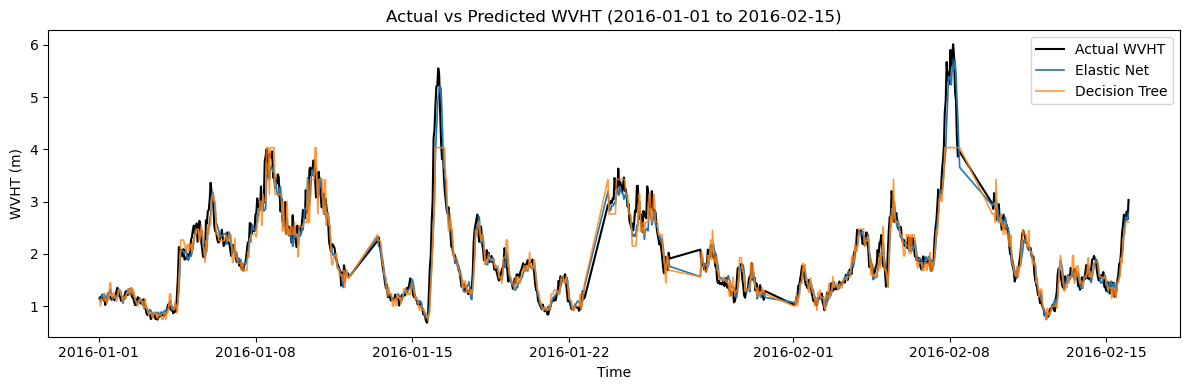

In [81]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Actual WVHT (from Elastic Net DF, same as from tree DF)
plt.plot(common_idx, elastic_win["y_true"], label="Actual WVHT", color="black", linewidth=1.5)

# Elastic Net predictions
plt.plot(common_idx, elastic_win["y_pred"], label="Elastic Net", color="tab:blue", linewidth=1.2)

# Decision Tree predictions
plt.plot(common_idx, dt_win["y_pred"], label="Decision Tree", color="tab:orange", linewidth=1.2, alpha=0.8)

plt.ylabel("WVHT (m)")
plt.xlabel("Time")
plt.title("Actual vs Predicted WVHT (2016-01-01 to 2016-02-15)")
plt.legend()
plt.tight_layout()
plt.show()


## Is the above two models overfitting?

In [86]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def rolling_cv_train_val_metrics(model, data: pd.DataFrame):
    """
    For each rolling-year fold, compute MAE/RMSE on both:
    - train segment
    - validation segment

    Returns a DataFrame with one row per fold and 4 metrics.
    """
    idx = data.index

    # identify target column
    target_cols = [c for c in data.columns if c.startswith(TARGET_COL + "_t_plus_")]
    assert len(target_cols) == 1
    target_col = target_cols[0]

    X_all = data.drop(columns=[target_col])
    y_all = data[target_col]

    rows = []

    for fold_name, train_mask, val_mask in rolling_year_splits(idx):
        X_train, y_train = X_all[train_mask], y_all[train_mask]
        X_val,   y_val   = X_all[val_mask], y_all[val_mask]

        mdl = model.__class__(**model.get_params())
        mdl.fit(X_train, y_train)

        # Train predictions and metrics
        y_pred_train = mdl.predict(X_train)
        train_mae  = mean_absolute_error(y_train, y_pred_train)
        train_mse = mean_squared_error(y_train, y_pred_train)
        train_rmse = np.sqrt(train_mse)

        # Validation predictions and metrics
        y_pred_val = mdl.predict(X_val)
        val_mae  = mean_absolute_error(y_val, y_pred_val)
        val_mse = mean_squared_error(y_val, y_pred_val)
        val_rmse = np.sqrt(val_mse)

        rows.append({
            "fold": fold_name,
            "train_MAE": train_mae,
            "train_RMSE": train_rmse,
            "val_MAE": val_mae,
            "val_RMSE": val_rmse,
        })

    df_metrics = pd.DataFrame(rows)
    return df_metrics


In [87]:
elastic_model = ElasticNet(
    alpha=best_alpha,
    l1_ratio=best_l1ratio,
    fit_intercept=True,
    max_iter=10000,
    random_state=42,
)

elastic_tv = rolling_cv_train_val_metrics(elastic_model, lagged_data)
print("Elastic Net train vs val metrics:")
display(elastic_tv)

print("\nMean train MAE :", elastic_tv["train_MAE"].mean())
print("Mean val  MAE :", elastic_tv["val_MAE"].mean())


Elastic Net train vs val metrics:


,fold,train_MAE,train_RMSE,val_MAE,val_RMSE
0,train_≤2015_val_2016,0.107583,0.148881,0.120179,0.173667
1,train_≤2016_val_2017,0.113486,0.159118,0.119710,0.172034



Mean train MAE : 0.11053473745714155
Mean val  MAE : 0.11994466666498203


In [88]:
dt_model = DecisionTreeRegressor(
    max_depth=int(best_dt["max_depth"]) if pd.notna(best_dt["max_depth"]) else None,
    min_samples_split=int(best_dt["min_samples_split"]),
    min_samples_leaf=int(best_dt["min_samples_leaf"]),
    max_features=float(best_dt["max_features"]),
    random_state=42,
)

dt_tv = rolling_cv_train_val_metrics(dt_model, lagged_data)
print("Decision Tree train vs val metrics:")
display(dt_tv)

print("\nMean train MAE :", dt_tv["train_MAE"].mean())
print("Mean val  MAE :", dt_tv["val_MAE"].mean())


Decision Tree train vs val metrics:


,fold,train_MAE,train_RMSE,val_MAE,val_RMSE
0,train_≤2015_val_2016,0.095039,0.134343,0.135853,0.207401
1,train_≤2016_val_2017,0.103460,0.147209,0.133714,0.202752



Mean train MAE : 0.09924941030016754
Mean val  MAE : 0.1347834425988711


## Clearly from the above it is not overfitting 